In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    RowNumber   —corresponds to the record (row) number and has no effect on the output.
    CustomerId  —contains random values and has no effect on customer leaving the bank.
    Surname     —the surname of a customer has no impact on their decision to leave the bank.
    CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    Geography   —a customer’s location can affect their decision to leave the bank.
    Gender      —it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    Age         —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    Tenure      —refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
    Balance     —also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    NumOfProducts —refers to the number of products that a customer has purchased through the bank.
    HasCrCard   —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
    IsActiveMember —active customers are less likely to leave the bank.
    EstimatedSalary —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    Exited      —whether or not the customer left the bank.
    Complain    —customer has complaint or not.
    Satisfaction Score —Score provided by the customer for their complaint resolution.
    Card Type   —type of card hold by the customer.
    Points Earned —the points earned by the customer for using credit card.

In [3]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [7]:
sns.set(style="whitegrid")

0    3117
1     500
Name: Exited, dtype: int64


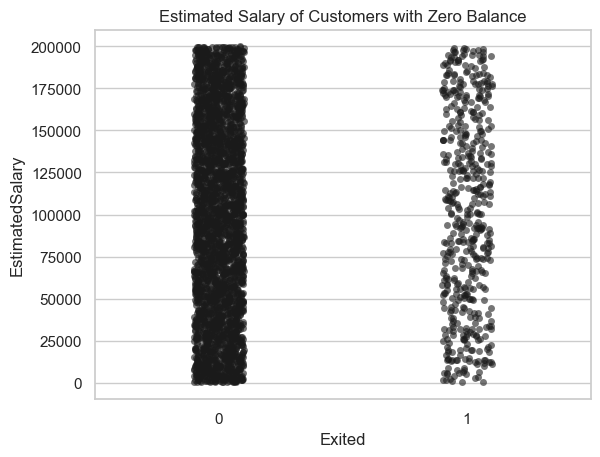

In [8]:
print(df[df['Balance']==0].Exited.value_counts())
# The majority of customers with zero balance are not exiting the bank.
# here we can see that 3617 customers with zero balance. And 3117 of them are not exiting the bank.
# only 500 customer exiting the bank. 
sns.stripplot(x='Exited', y='EstimatedSalary', data=df[df['Balance']==0], color='k', alpha=0.6)
plt.title('Estimated Salary of Customers with Zero Balance')
plt.show()

In [9]:
# Function to draw countplot with labels
def plot_categorical_vs_churn(column,  title, ax, hue='Exited'):
    ax = sns.countplot(x=column, hue=hue, data=df, palette='Set2', ax=ax)
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=8)
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.set_xlabel(column)

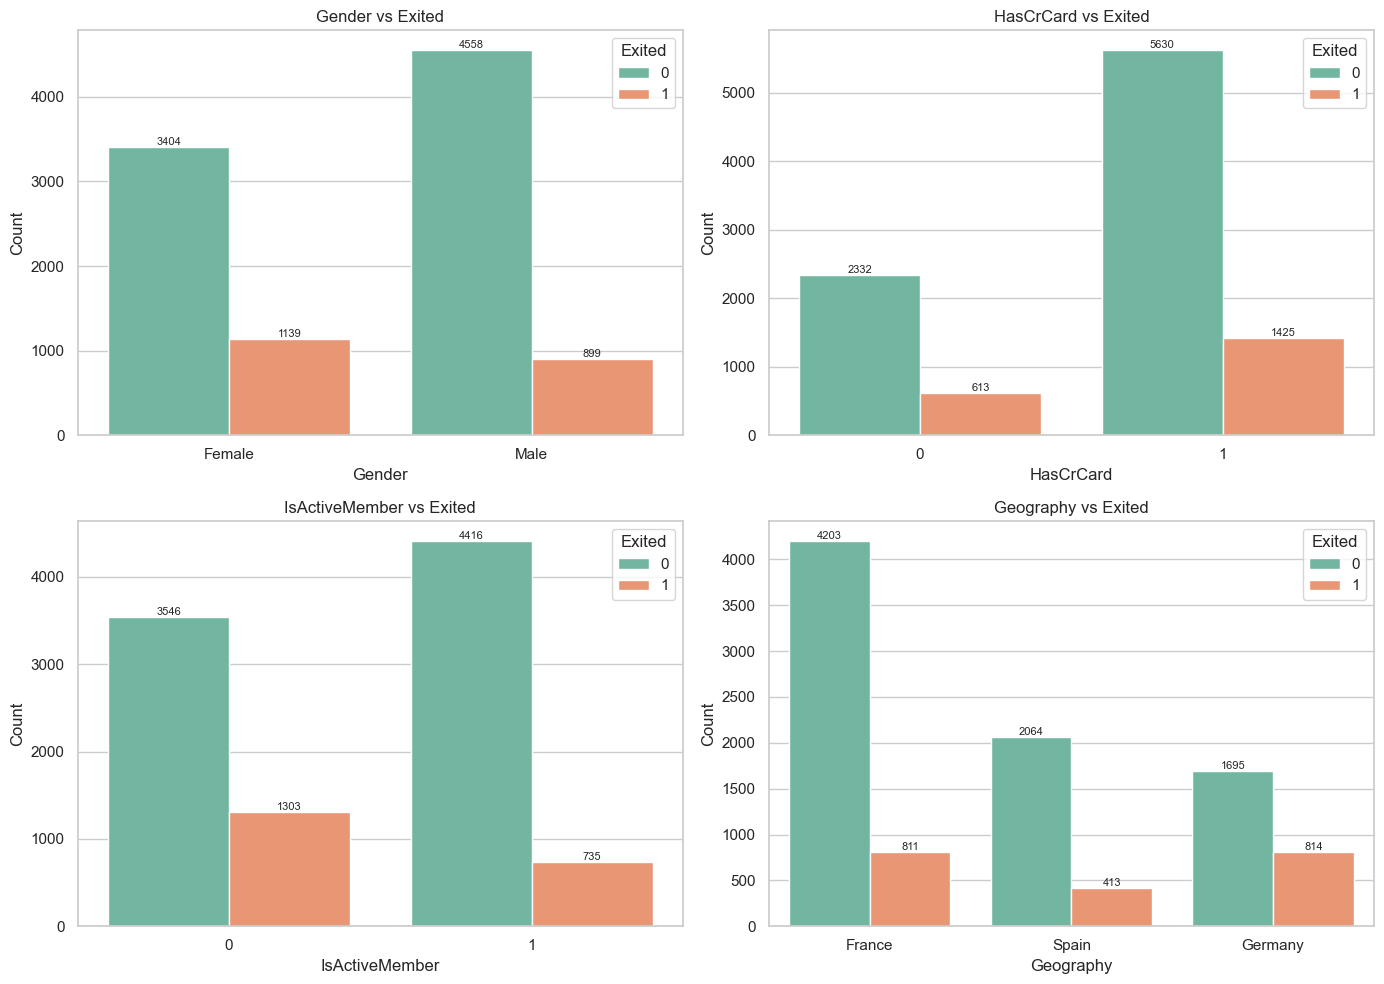

In [10]:
# Create 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot combinations like in the image
plot_categorical_vs_churn("Gender", "Gender vs Exited", axs[0,0])
plot_categorical_vs_churn("HasCrCard", "HasCrCard vs Exited", axs[0, 1])
plot_categorical_vs_churn("IsActiveMember", "IsActiveMember vs Exited", axs[1, 0])
plot_categorical_vs_churn("Geography", "Geography vs Exited", axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

<h5>Gender Analysis</h5>
    16.5% of males were churned and 25% of females were churned
<h5>Customer has credit card Analysis</h5>
    20% churned even customer has credit card<br>
    20.8% churned from total customer with not credit card
<h5>Customer is active or not Analysis</h5>
    14% customer churned even thay active<br>
    26.9% customer churned from total inactive customers
<h5>Geography Analysis</h5>
    Germany has churn rate(32.4%) followed by France(16%) and Spain(16.7%)
    

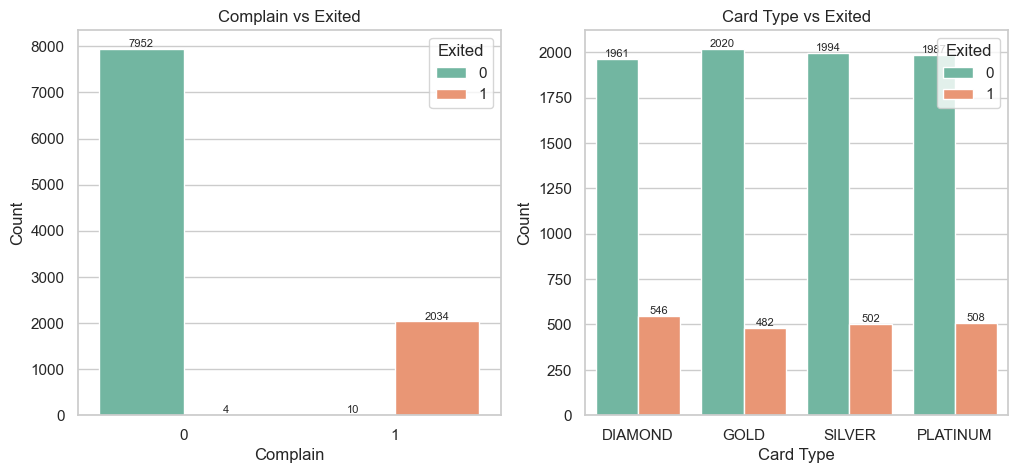

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_categorical_vs_churn('Complain', 'Complain vs Exited', axs[0])
plot_categorical_vs_churn('Card Type', 'Card Type vs Exited', axs[1])

<h5>Complain Analysis</h5>
    Out of total customers(2044) complaint, 2034 customers left, only 10 customers are stay.<br>
    Out of total customers(7956) complaint, only 4 customer left, reamining all are stay.
<h5>Card Type Analysis</h5>
    Equal ratio of customer churns in all types of card.

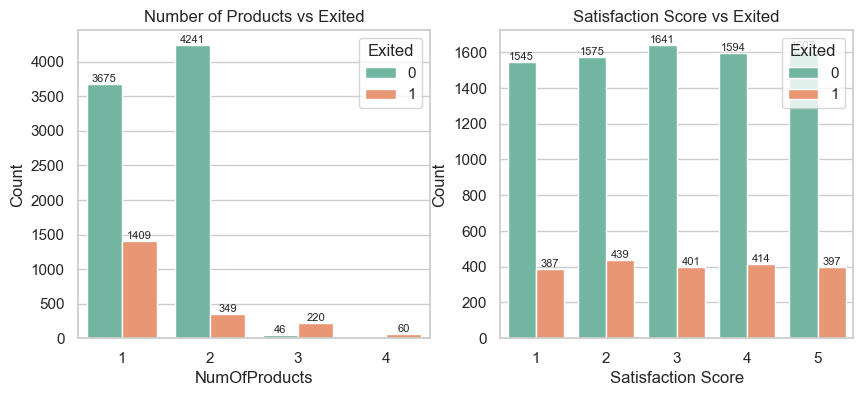

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_categorical_vs_churn('NumOfProducts', 'Number of Products vs Exited', axs[0])
plot_categorical_vs_churn('Satisfaction Score', 'Satisfaction Score vs Exited', axs[1])

In [111]:
df[df['NumOfProducts']==2].groupby('HasCrCard')['Exited'].value_counts()

HasCrCard  Exited
0          0         1232
           1          112
1          0         3009
           1          237
Name: Exited, dtype: int64

    From above graph we can see that 2nd highest number of customer having 2 products.

    Further, Highest num. of Customers who has 1 product 27.7% are left the bank.
    And Customer with Number of products 3 and 4 are more likely leave the bank. number of customers are less comparetively.


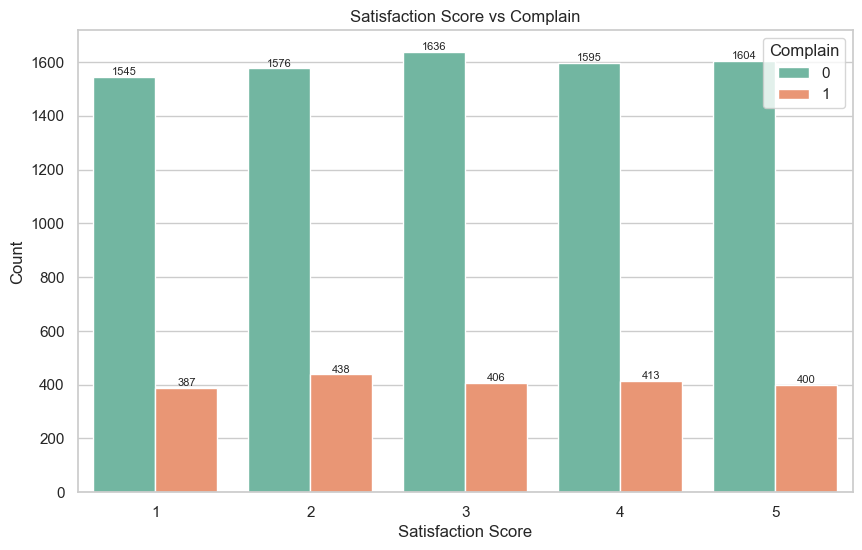

In [14]:
fig, axs = plt.subplots(figsize=(10, 6))
plot_categorical_vs_churn('Satisfaction Score', 'Satisfaction Score vs Complain', axs, hue='Complain')

<Axes: xlabel='Age', ylabel='CreditScore'>

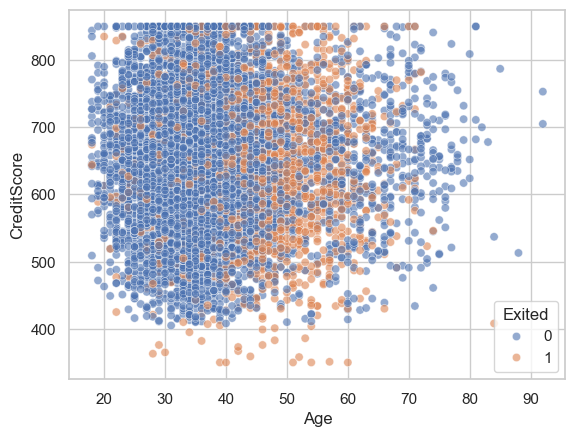

In [15]:
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df, alpha=0.6)

    Customer with "CreditScore" belove 400 are more likely to exited

<Axes: xlabel='Tenure', ylabel='Density'>

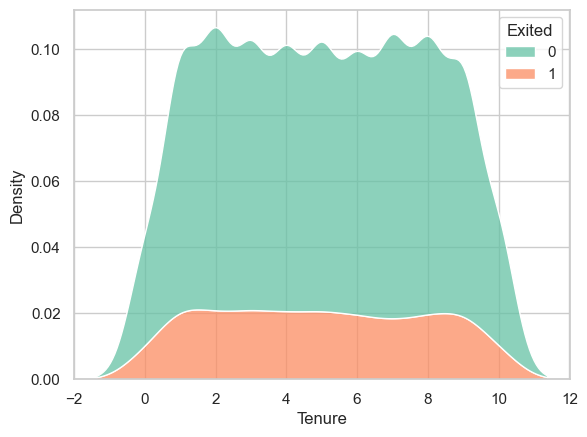

In [16]:
sns.kdeplot(data=df,x='Tenure',hue='Exited', multiple='stack', common_norm=True, palette='Set2',)

<Axes: xlabel='CreditScore', ylabel='Density'>

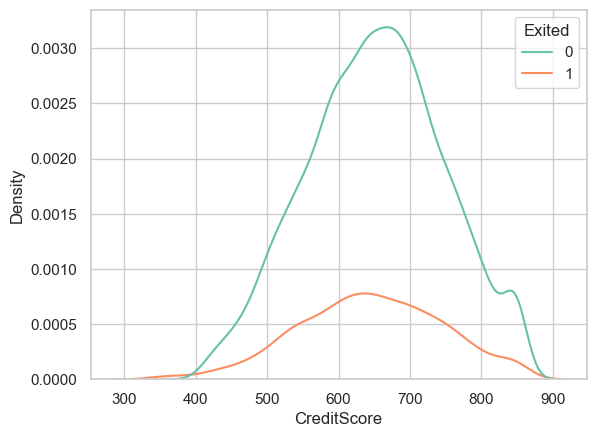

In [17]:
sns.kdeplot(data=df,x='CreditScore',hue='Exited', palette='Set2',)

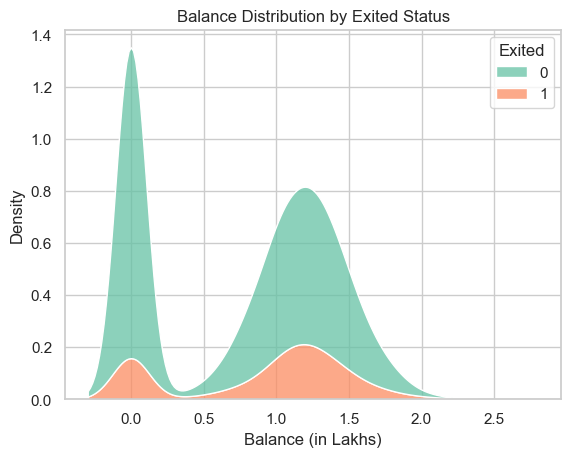

In [18]:
sns.kdeplot(x=df['Balance']/100000,hue=df['Exited'], multiple='stack', common_norm=True, palette='Set2')
plt.xlabel('Balance (in Lakhs)')
plt.title('Balance Distribution by Exited Status')
plt.show()

<Axes: xlabel='Point Earned', ylabel='Density'>

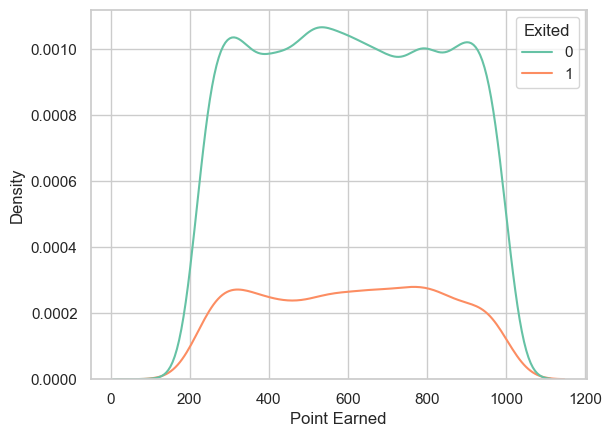

In [92]:
sns.kdeplot(data=df,x='Point Earned',hue='Exited', palette='Set2',)


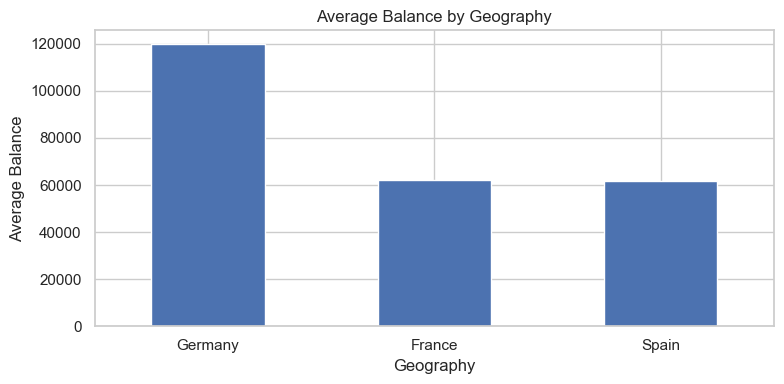

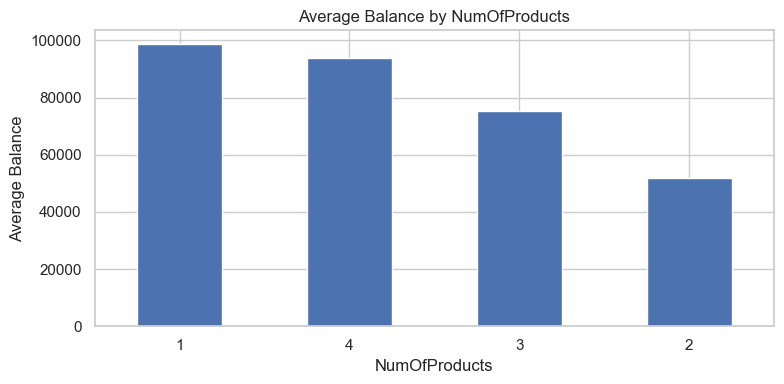

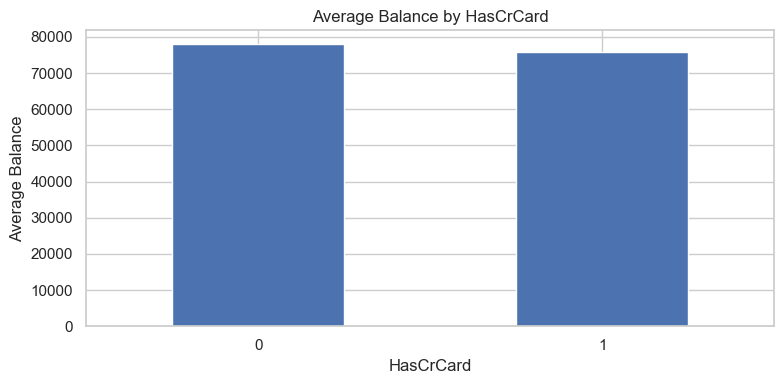

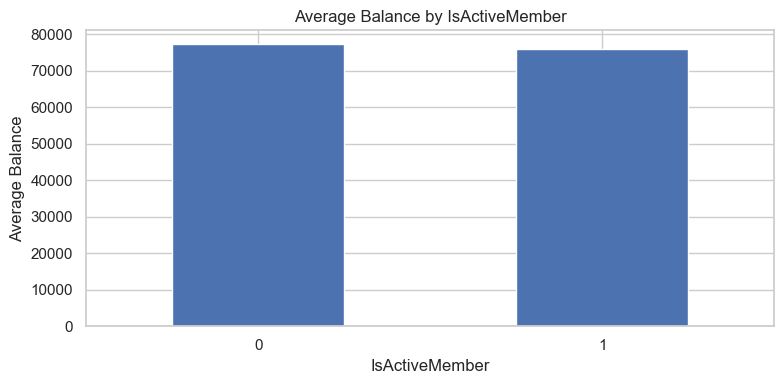

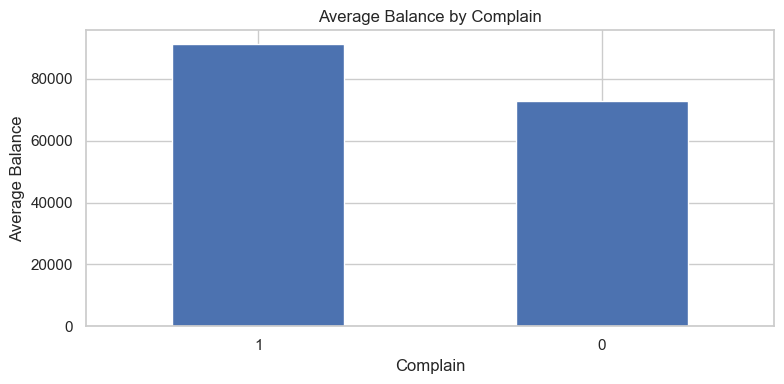

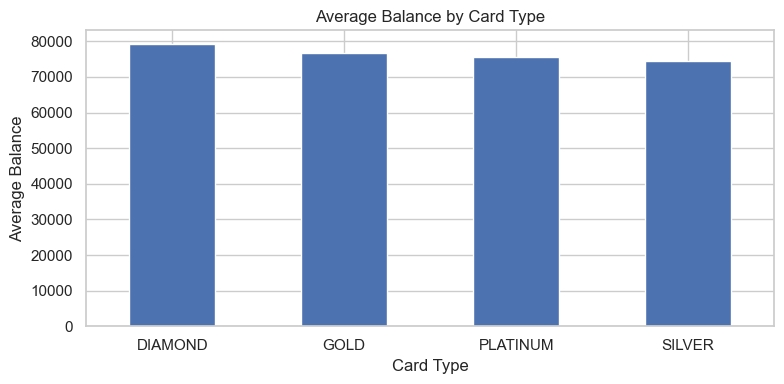

In [28]:
cat_features = ['Geography','NumOfProducts','HasCrCard','IsActiveMember','Complain','Card Type']
for i in cat_features:
    df.groupby(i)['Balance'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
    plt.title(f'Average Balance by {i}')
    plt.xlabel(i)
    plt.ylabel('Average Balance')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [40]:
df[df['CreditScore']<=400].groupby('IsActiveMember')['Balance'].mean()

IsActiveMember
0    96242.049231
1    83623.831667
Name: Balance, dtype: float64

In [85]:
df[df['CreditScore']<=400].where(df['HasCrCard']==1).groupby('IsActiveMember')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
IsActiveMember,,,,,,,,
0.0,10.0,104560.525000,58146.954367,0.0,98967.8950,127707.645,139843.6925,163146.46
1.0,6.0,83623.831667,66852.514908,0.0,26502.8975,108555.220,126741.0150,152677.48


In [94]:
df[df['CreditScore']<=400].where(df['HasCrCard']==0).groupby('IsActiveMember')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
IsActiveMember,,,,,,,,
0.0,3.0,68513.796667,59741.792124,0.0,47904.095,95808.19,102770.695,109733.2


In [95]:
df[df['CreditScore']<=400].where(df['HasCrCard']==0).groupby('Satisfaction Score')['Point Earned'].describe()


,count,mean,std,min,25%,50%,75%,max
Satisfaction Score,,,,,,,,
1.0,2.0,783.5,246.780267,609.0,696.25,783.5,870.75,958.0
2.0,1.0,261.0,NaN,261.0,261.00,261.0,261.00,261.0


In [ ]:
df[df['CreditScore']<=400].where(df['HasCrCard']==1).groupby('Satisfaction Score')['Point Earned'].describe()

,count,mean,std,min,25%,50%,75%,max
Satisfaction Score,,,,,,,,
1.0,1.0,981.00,NaN,981.0,981.00,981.0,981.00,981.0
2.0,4.0,563.75,326.896900,282.0,313.50,497.0,747.25,979.0
3.0,4.0,692.50,199.403276,549.0,581.25,617.5,728.75,986.0
4.0,5.0,562.60,261.306908,342.0,383.00,453.0,659.00,976.0
5.0,2.0,575.50,142.128463,475.0,525.25,575.5,625.75,676.0


In [ ]:
df[df['CreditScore']<=400].where(df['Complain']==1).groupby('Satisfaction Score').value_counts().sum(level=0)

C:\Users\bhumi\AppData\Local\Temp\ipykernel_15812\1743291176.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df[df['CreditScore']<=400].where(df['Complain']==1).groupby('Satisfaction Score').value_counts().sum(level=0)


Satisfaction Score
1    3
2    5
3    4
4    5
5    2
dtype: int64

In [109]:
df.where(df['Complain']==1).groupby('Satisfaction Score').value_counts().sum(level=0)

C:\Users\bhumi\AppData\Local\Temp\ipykernel_15812\563696654.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.where(df['Complain']==1).groupby('Satisfaction Score').value_counts().sum(level=0)


Satisfaction Score
1.0    387
2.0    438
3.0    406
4.0    413
5.0    400
dtype: int64